<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 2: Aplicación de Algoritmos Genéticos

### Ajuste de curvas con AG

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

### Ejemplo

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
N=100
x_1=np.linspace(0,10,N)
y_1=10+2*x_1+np.random.normal(loc=0,scale=2,size=(N,))

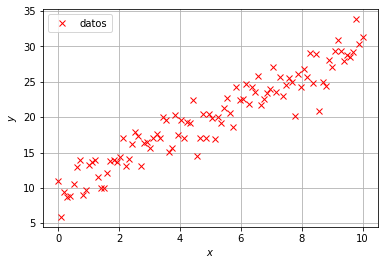

In [22]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x_1,y_1,'xr', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [20]:
from scipy import optimize as opt

In [21]:
help(opt.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

In [6]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta, x_points, y_points):
    n= len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [7]:
beta_ini = [0,0]

In [8]:
solucion = opt.minimize(fun=min_sqe, x0=beta_ini, args=(x_1,y_1))
solucion

      fun: 1.9416936178623574
 hess_inv: array([[ 3.93197386, -0.58680008],
       [-0.58680008,  0.11742201]])
      jac: array([ 1.04308128e-07, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([9.1885995 , 2.08536516])

In [23]:
Beta = solucion.x

In [24]:
Beta

array([9.1885995 , 2.08536516])

$$ \hat{f}(x) = 9.1885 +  2.085*x $$

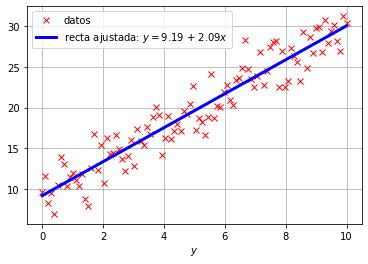

In [10]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x_1,y_1,'xr', label='datos')

f_hat = Beta[0] + Beta[1]*x_1

plt.plot(x_1, f_hat, 'b', lw=3, label=f'recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

In [25]:
# Generar datos
N=100
x=np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3,size=(N,))

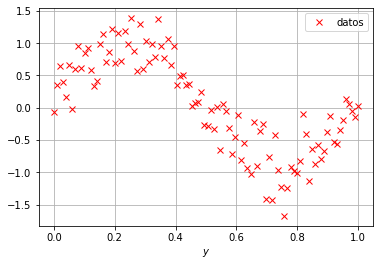

In [26]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

In [27]:
def min_sq_N(beta, x_points, y_points,N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    sqe_n = (1/(2*n))*((y_points - f_hat_N)**2).sum()
    return sqe_n

In [28]:
solucion_N = opt.minimize(fun=min_sq_N, x0=np.zeros(4), args=(x,y,3))
solucion_N

      fun: 0.04218606285183207
 hess_inv: array([[   14.38705727,  -108.33410815,   216.88454463,  -126.49794648],
       [ -108.33410815,  1109.46090376, -2514.10916037,  1567.76928874],
       [  216.88454463, -2514.10916037,  6078.3912929 , -3946.47480156],
       [ -126.49794648,  1567.76928874, -3946.47480156,  2633.90017099]])
      jac: array([7.27362931e-07, 2.33296305e-07, 2.90572643e-07, 3.28291208e-07])
  message: 'Optimization terminated successfully.'
     nfev: 165
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([-1.69770629e-02,  1.07294718e+01, -3.21819324e+01,  2.17279627e+01])

In [29]:
Beta_N=solucion_N.x

In [30]:
Beta_N

array([-1.69770629e-02,  1.07294718e+01, -3.21819324e+01,  2.17279627e+01])

$$ \hat{f}(x) = -1.69770629e^{-02} +  1.07294718e^{01} x -3.21819324e^{01} x^2 + 2.17279627e^{01}x^3$$

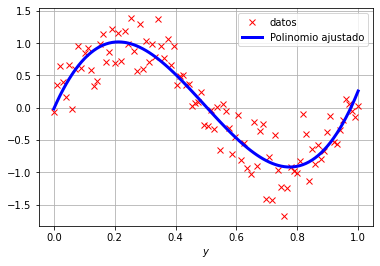

In [31]:
#graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')

f_hat_N = np.array([Beta_N[i]*x**i for i in range(3+1)]).sum(axis=0)
plt.plot(x,f_hat_N, 'b', lw=3, label='Polinomio ajustado')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### Utilizando AG para ajuste de curvas

In [32]:
from AG import AG as ag

ModuleNotFoundError: No module named 'AG'

### utilizar AG para encontrar el modelo polinomial